# Лабораторна робота 6


**Тема:** Ознайомлення з TensorFlow


Встановлення
білбліотек:

In [ ]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install sklearn
! pip install tensorflow

### Загальні операції з використанням TensorFlow

In [24]:
import tensorflow as tf
import numpy as np

# Create
scalar = tf.constant(5)
vector = tf.constant([1,2,3,4,5])
matrix = tf.constant([[1,2,3,4],
                      [5,6,7,8],
                      [9,10,11,12]])

# Read
print("Scalar\n", scalar, "\n")
print("Vector\n", vector, "\n")
print("Matrix\n", matrix, "\n")

# Update
scalar = tf.Variable(scalar)
scalar.assign(6)
vector = tf.Variable(vector)
vector[2].assign(8)
matrix = tf.Variable(matrix)
matrix[2,3].assign(1)
print("Updated:")
print("Scalar\n", scalar, "\n")
print("Vector\n", vector, "\n")
print("Matrix\n", matrix, "\n")

#Delete
del scalar, vector, matrix

Scalar
 tf.Tensor(5, shape=(), dtype=int32) 

Vector
 tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32) 

Matrix
 tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32) 

Updated:
Scalar
 <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=6> 

Vector
 <tf.Variable 'Variable:0' shape=(5,) dtype=int32, numpy=array([1, 2, 8, 4, 5])> 

Matrix
 <tf.Variable 'Variable:0' shape=(3, 4) dtype=int32, numpy=
array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11,  1]])> 



### Функції генерації набору даних для регресії та класифікації

In [55]:
def regression_dataset(samples, start_pt, end_pt, err):
    X = tf.constant (np.arange(start_pt[0], end_pt[0]
                  , (end_pt[0]-start_pt[0])/samples))
    
    y_pred = np.arange(start_pt[1], end_pt[1]
                  , (end_pt[1]-start_pt[1])/samples)
    
    y = tf.constant(y_pred + np.random.randn(samples)*err)
    return X, y


def classification_dataset(n_samples=100, n_features=2, n_classes=3):
    X = []
    y = []
    samples_per_class = n_samples//n_classes
    remainder = n_samples % n_classes
    
    # generating a cluster center for each class and generating random data around it
    for i in range(n_classes):
        center = np.random.randn(n_features) * 5
        
        # any samples that weren't assigned to any class will be in the last class to keep demanded amount of samples
        if i == n_classes-1:
            samples_per_class += remainder
        
        data = np.random.randn(samples_per_class, n_features)
        X.extend(center + data)
        y.extend(np.full(samples_per_class, i))
    return tf.constant(X), tf.constant(y)
        
    

##

### Візуалізація генерації даних

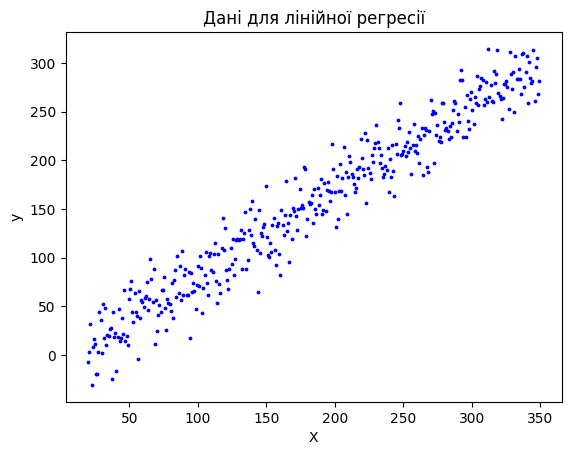

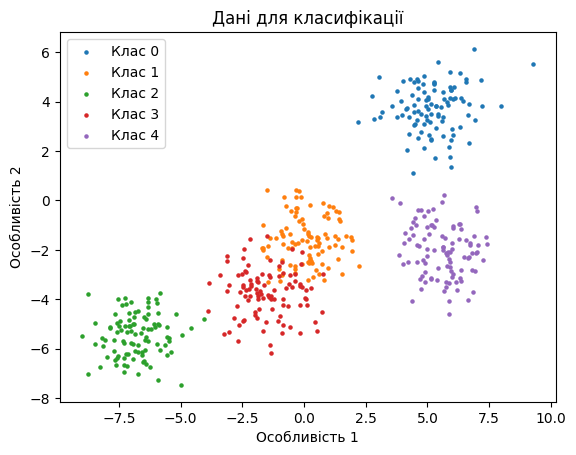

In [57]:
from matplotlib import pyplot as plt

X, y = regression_dataset(400,(20,10),(350, 300), 20)
plt.scatter(X, y, color='blue', s=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Дані для лінійної регресії')
plt.show()

X, y = classification_dataset(500, 2, 5)
for class_value in np.unique(y):
    class_data = X[y == class_value]
    plt.scatter(class_data[:,0], class_data[:,1],
                label=f'Клас {class_value}', s=5)
plt.title('Дані для класифікації')
plt.xlabel("Особливість 1")
plt.ylabel("Особливість 2")
plt.legend()
plt.show()